<a href="https://colab.research.google.com/github/Ahwera/-Prediction-of-Product-Sales-/blob/main/WEEK_4_CORE_Sales__Predic_Betty_Project_1_2_Copy_of_Untitled7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [201]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import missingno as msno

In [202]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [203]:
#Load the data
df_sales_predic = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/sales_predictions_2023.csv')
df_sales_predic.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [204]:
num_row_column = df_sales_predic.shape
num_row_column

(8523, 12)

In [205]:
#Create a data frame
data_types = df_sales_predic.dtypes

In [206]:
# What are the datatypes of each variable?
data_types

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [207]:
#Are there duplicates? If so, drop any duplicates
duplicates_row = df_sales_predic.duplicated(keep=False)

In [ ]:
duplicates_row.sum()

0

In [208]:
#drop duplicates
df_sales_predic.drop_duplicates()
df_sales_predic.duplicated().sum()

0

In [209]:
# Identify missing values
df_sales_predic.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [210]:
#Address the missing values by using a placeholder value
duplicated_rows = df_sales_predic.duplicated(keep=False)
duplicated_rows.sum()

0

In [211]:
#Address the missing values by using a placeholder value
num_sales_col = df_sales_predic.select_dtypes('number').columns
df_sales_predic[num_sales_col].isna().sum()

Item_Weight                  1463
Item_Visibility                 0
Item_MRP                        0
Outlet_Establishment_Year       0
Item_Outlet_Sales               0
dtype: int64

In [212]:
#Remove the placeholders you added in week 2 and replace them with null values
df_sales_predic['Item_Weight'].fillna(999, inplace=True)
# Visualizing using .value_counts() method
df_sales_predic['Item_Weight'].value_counts(dropna=True)

999.000    1463
12.150       86
17.600       82
13.650       77
11.800       76
           ... 
7.275         2
7.685         1
9.420         1
6.520         1
5.400         1
Name: Item_Weight, Length: 416, dtype: int64

<Axes: >

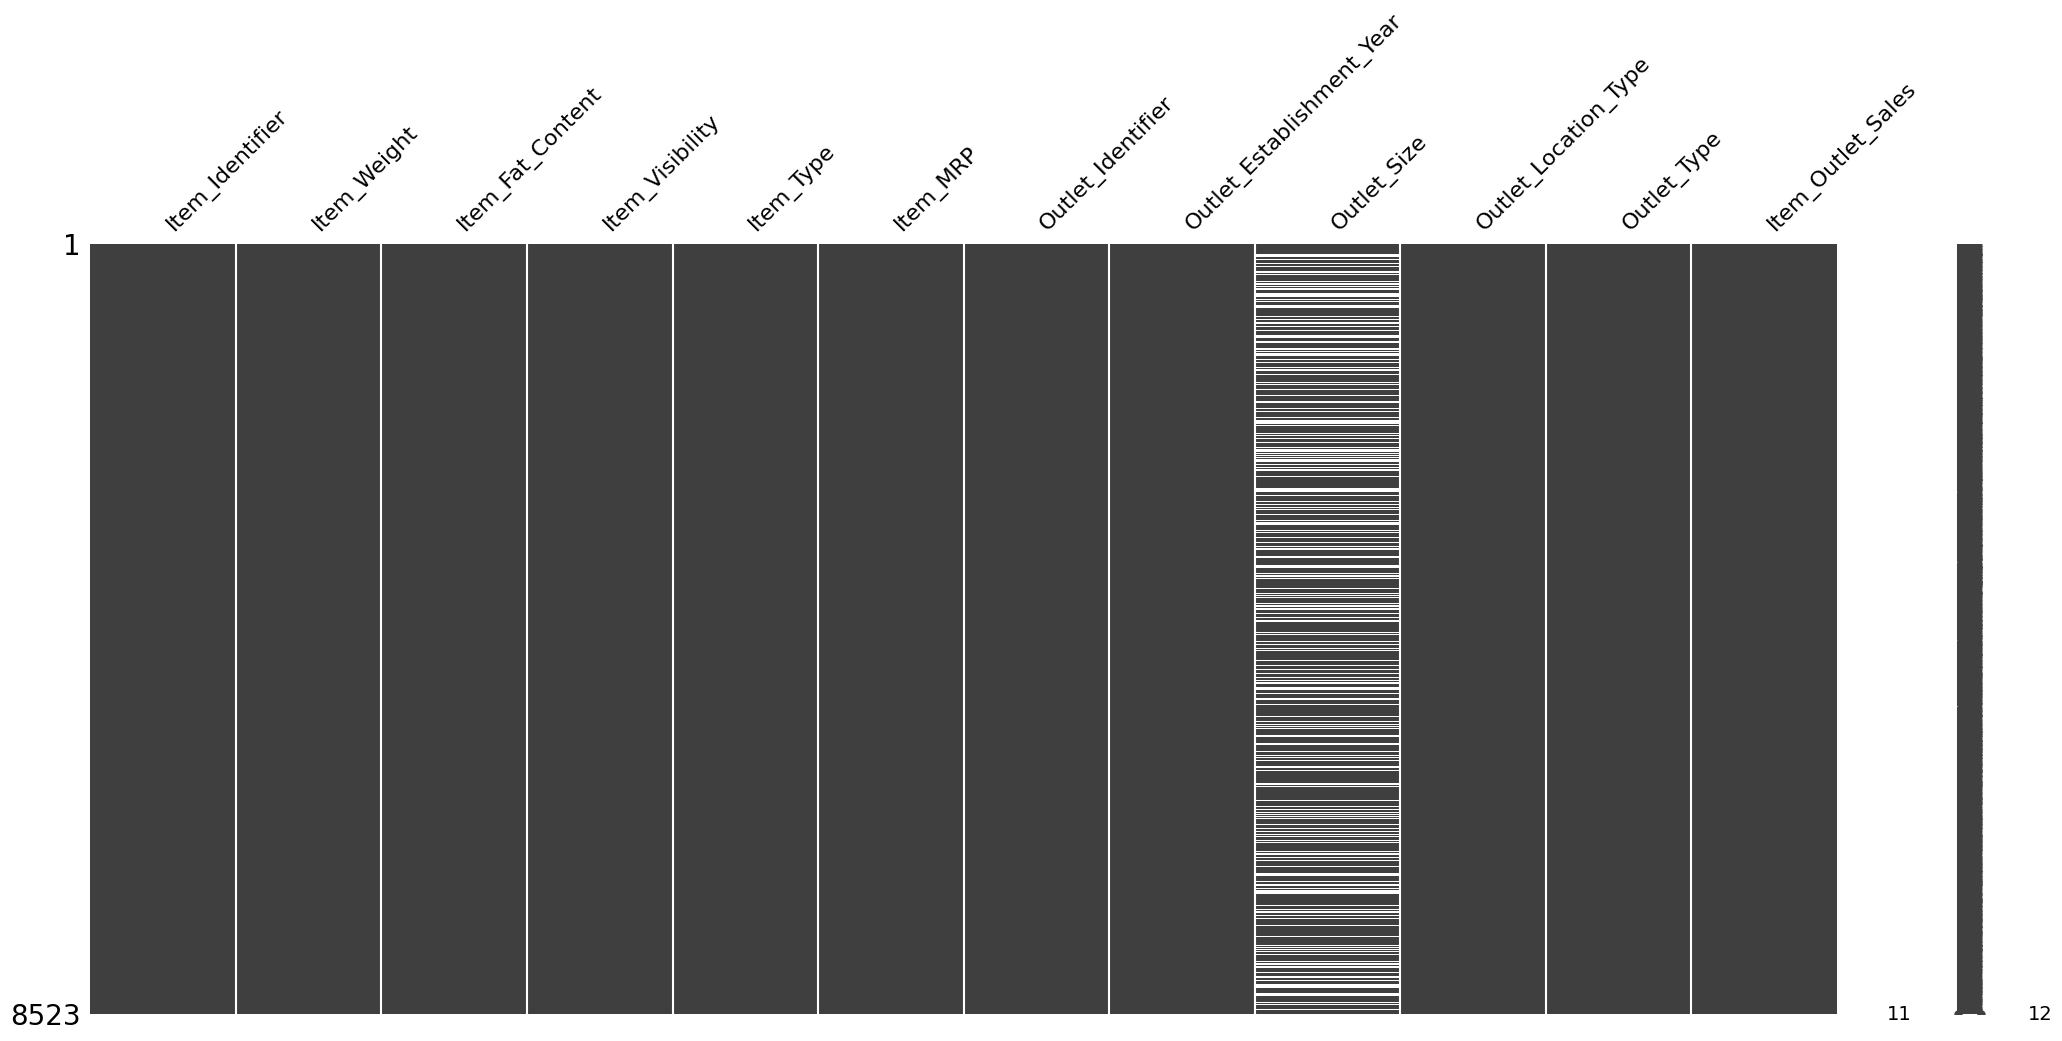

In [213]:
# Confirming for no missing values after address
msno.matrix(df_sales_predic)

In [214]:
# Sorting out string/object features
obj_sales_col = df_sales_predic.select_dtypes('object').columns

df_sales_predic[obj_sales_col].isna().sum()

Item_Identifier            0
Item_Fat_Content           0
Item_Type                  0
Outlet_Identifier          0
Outlet_Size             2410
Outlet_Location_Type       0
Outlet_Type                0
dtype: int64

In [215]:
# Filling up for the missing values
df_sales_predic['Outlet_Size'].fillna('MISSING', inplace=True)

# Visualizing and confirming if filled up
df_sales_predic['Outlet_Size'].value_counts(dropna=False)

Medium     2793
MISSING    2410
Small      2388
High        932
Name: Outlet_Size, dtype: int64

In [216]:
#Address the missing values by using a placeholder value
num_sales_col = df_sales_predic.select_dtypes('number').columns
df_sales_predic[num_sales_col].isna().sum()

Item_Weight                  0
Item_Visibility              0
Item_MRP                     0
Outlet_Establishment_Year    0
Item_Outlet_Sales            0
dtype: int64

In [217]:
# Filling up for the missing values
df_sales_predic['Item_Weight'].fillna('999', inplace=True)

# Visualizing and confirming if filled up
df_sales_predic['Item_Weight'].value_counts(dropna=False)

999.000    1463
12.150       86
17.600       82
13.650       77
11.800       76
           ... 
7.275         2
7.685         1
9.420         1
6.520         1
5.400         1
Name: Item_Weight, Length: 416, dtype: int64

<Axes: >

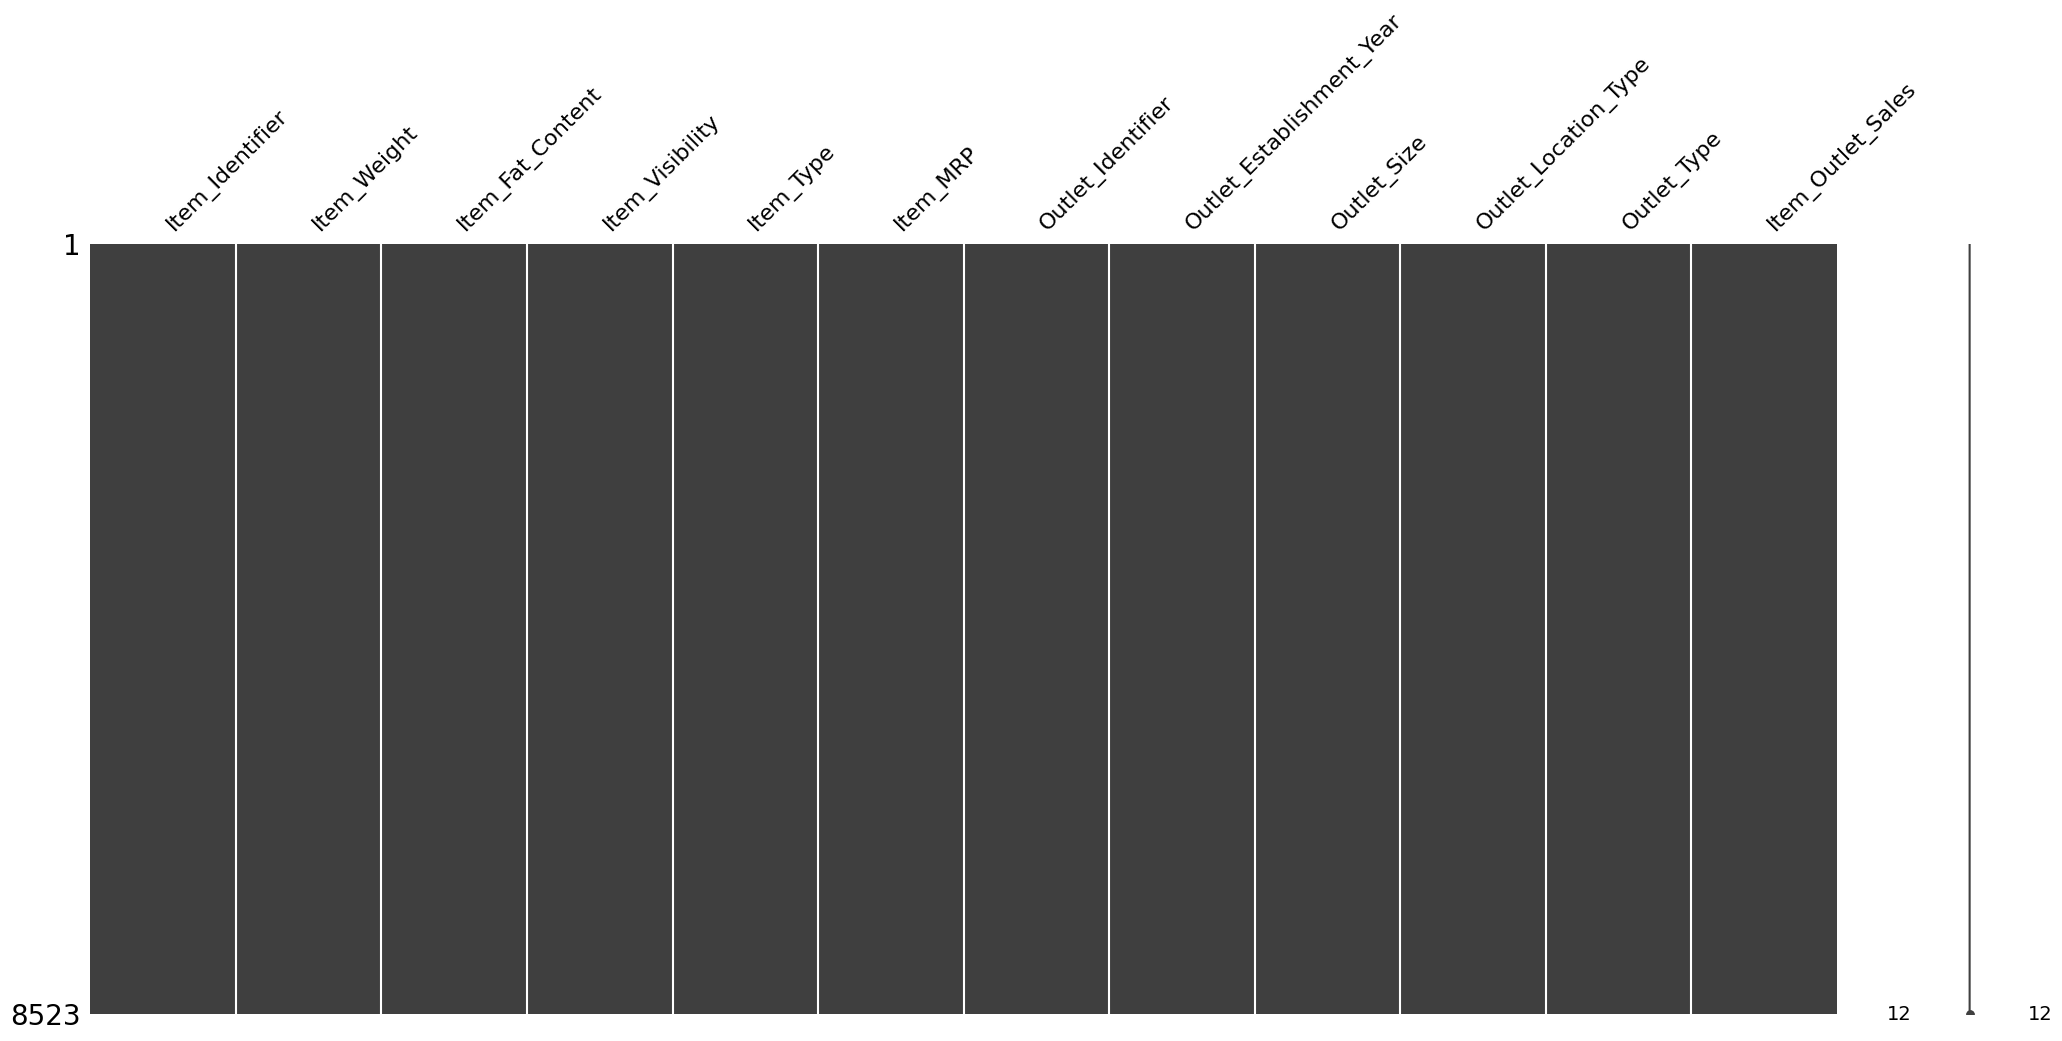

In [218]:
# Confirming for no missing values after address
msno.matrix(df_sales_predic)

In [219]:
#Find and fix any inconsistent categories of data
df_sales_predic.nunique()

Item_Identifier              1559
Item_Weight                   416
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     4
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

In [220]:
#For any numerical columns, obtain the summary statistics of each (min, max, mean)
df_sales_predic.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,182.132110,0.066132,140.992782,1997.831867,2181.288914
std,371.899127,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,14.500000,0.053931,143.012800,1999.000000,1794.331000
75%,19.500000,0.094585,185.643700,2004.000000,3101.296400
max,999.000000,0.328391,266.888400,2009.000000,13086.964800


#Univariate visualization

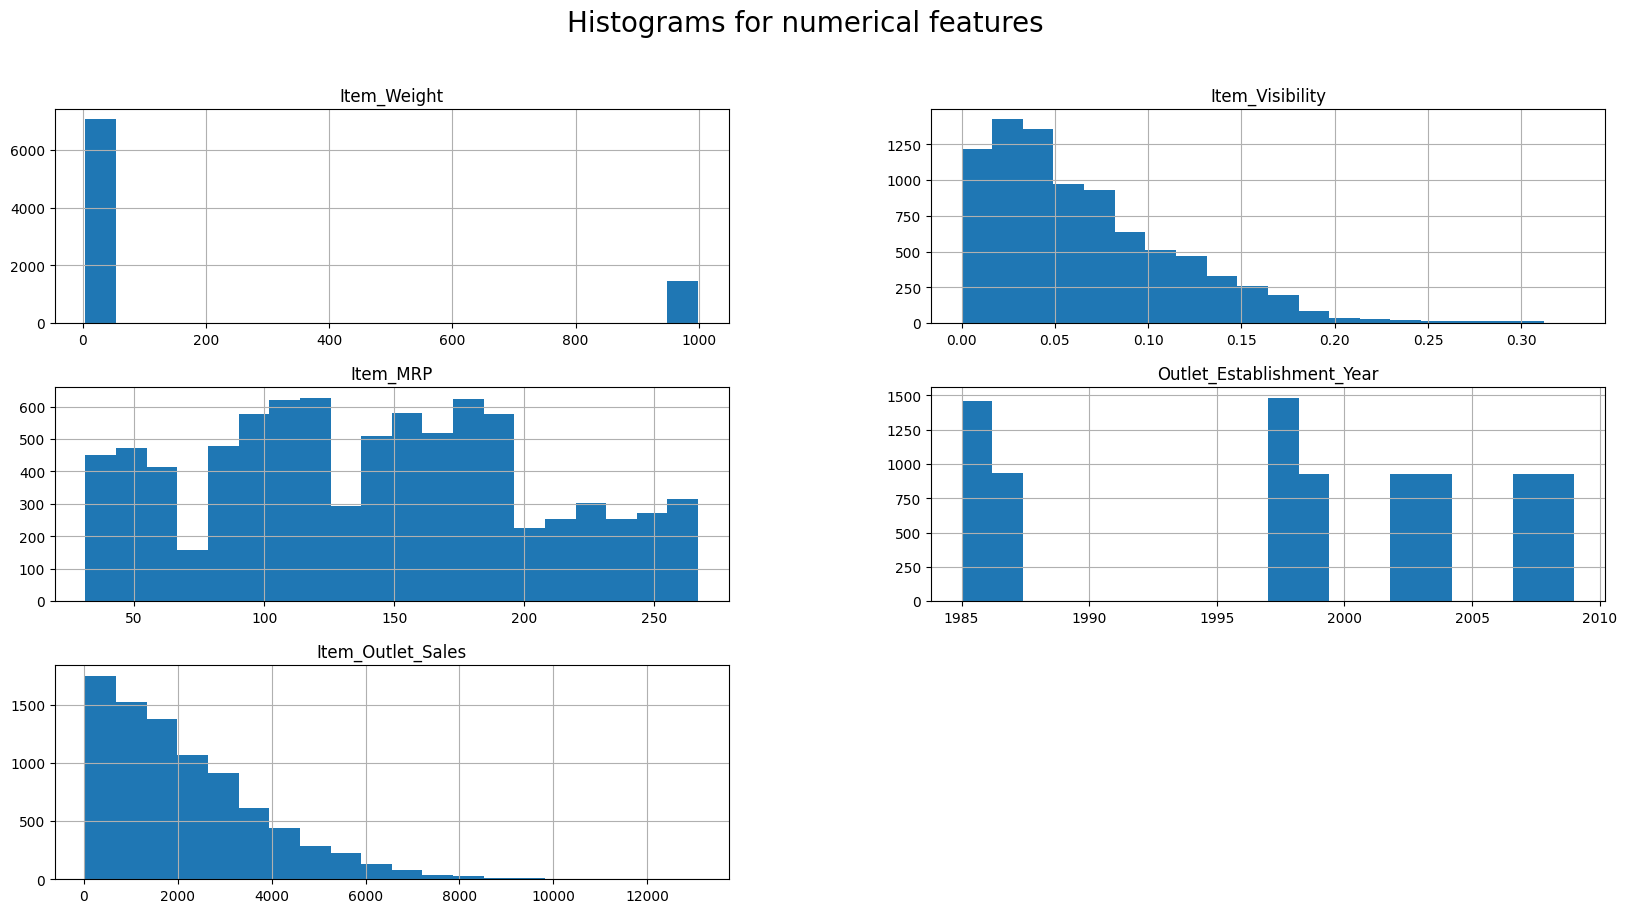

In [221]:
#Histogram
numerical_features = df_sales_predic.select_dtypes('number').columns
df_sales_predic[numerical_features].hist(bins=20, figsize=(20, 10))
plt.suptitle('Histograms for numerical features', fontsize=20)
plt.show();

In [222]:
#Boxplot
data = {
    'A': ['Item_Visibility'],
    'B': ['Item_MRP'],
    'C': ['Outlet_Establishment_Year'],
    'D': ['Item_Outlet_Sales']}

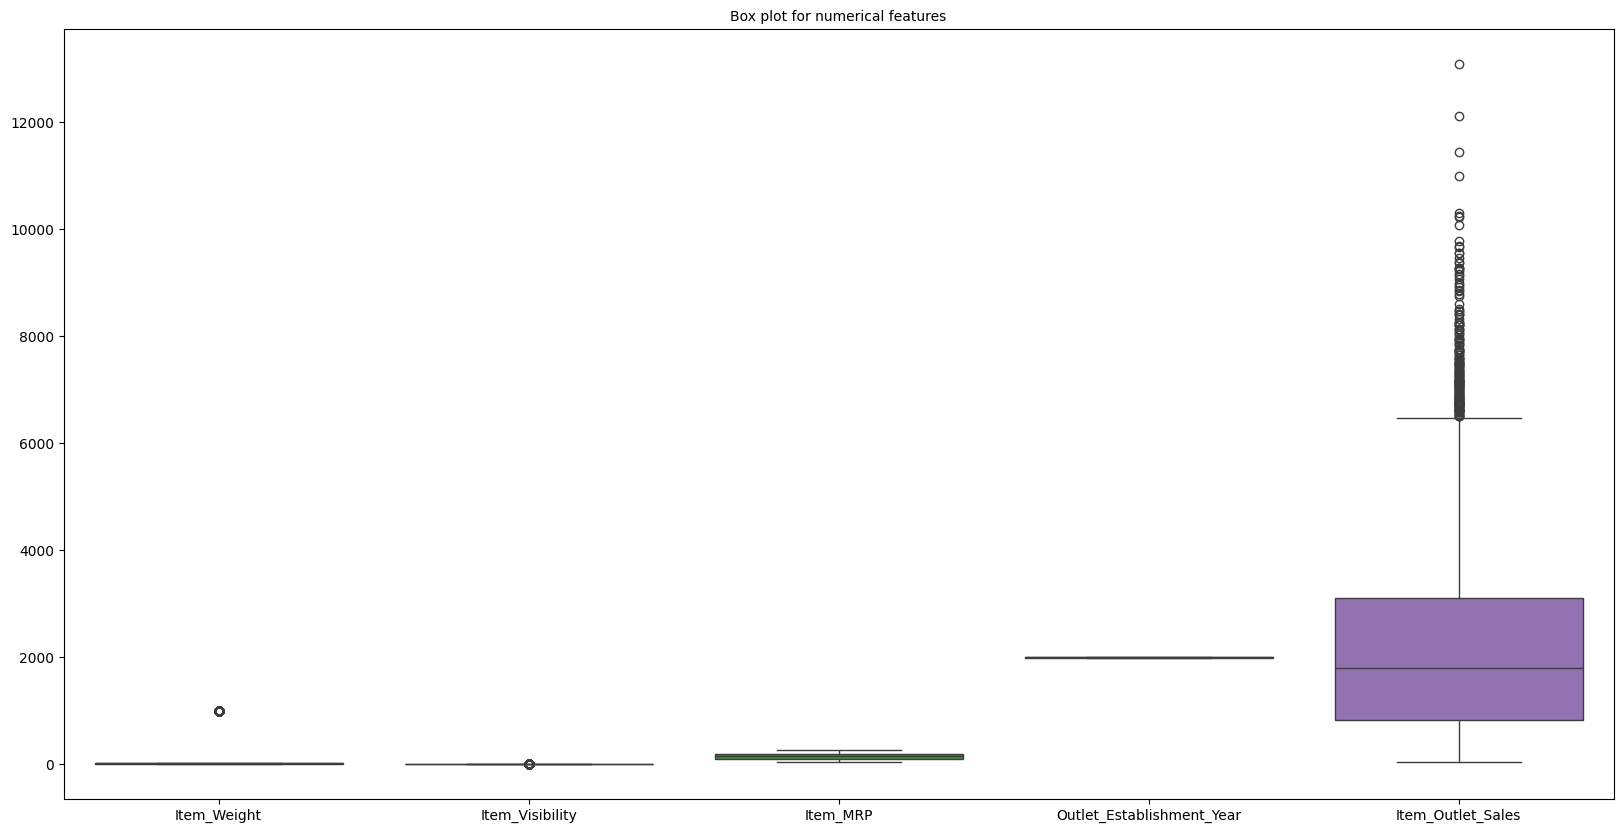

In [223]:
plt.figure(figsize=(20, 10))
sns.boxplot(data=df_sales_predic[numerical_features])
plt.title('Box plot for numerical features',fontsize=10)
#plt.xlabel('Columns')
#plt.ylabel('Values')
plt.show();

In [224]:
# Saving the value counts for one column (Item_Outlet_Sales)
val_counts = df_sales_predic['Outlet_Size'].value_counts()
val_counts

Medium     2793
MISSING    2410
Small      2388
High        932
Name: Outlet_Size, dtype: int64

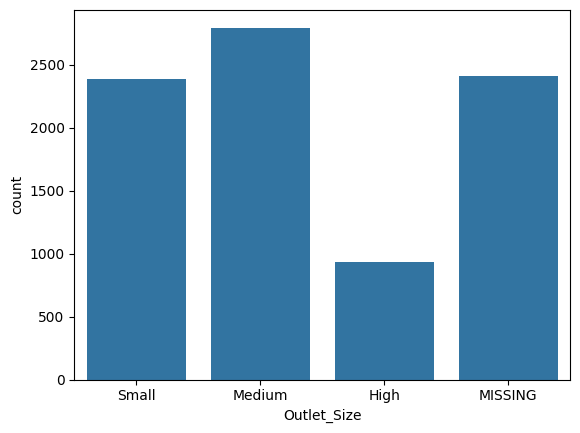

In [225]:
# Seaborn countplot for the Item_Outlet_Sales column
ax = sns.countplot(data=df_sales_predic, x="Outlet_Size",order = ['Small', 'Medium', 'High', 'MISSING'])

In [226]:
#What type of feature is it? (Categorical (nominal), ordinal, numeric)
feature = "Outlet_Size"
df_sales_predic[feature].dtype

dtype('O')

In [227]:
#What type of feature is it? (Categorical (nominal), ordinal, numeric)

## Ordinal

In [228]:
#How many null values?
null_count = df_sales_predic['Outlet_Size'].isna().sum()
null_count

0

In [229]:
# What percentage? What would you do with the null values
null_perc = null_count/len(df_sales_predic)* 100
null_perc

0.0

In [230]:
#(drop the rows? drop the column? impute? If impute, with what?)
df = df_sales_predic.dropna(subset=["Outlet_Size"])
df['Outlet_Size'].isna().sum()

0

In [160]:
#Is the feature constant or quasi-constant?

## A quasi-constant


In [231]:
#What is the cardinality? Is it high (>10)?
cardinality = df_sales_predic.nunique()
print(cardinality)

Item_Identifier              1559
Item_Weight                   416
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     4
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64


## Low since cardinality is 4 and less than 10

In [ ]:
#Would we know this feature before the target is determined?


## Yes we can determine the feature before identifying the target variable

In [ ]:
# Is there a business case/understanding reason to exclude based on our business case?


#multivariate visualization

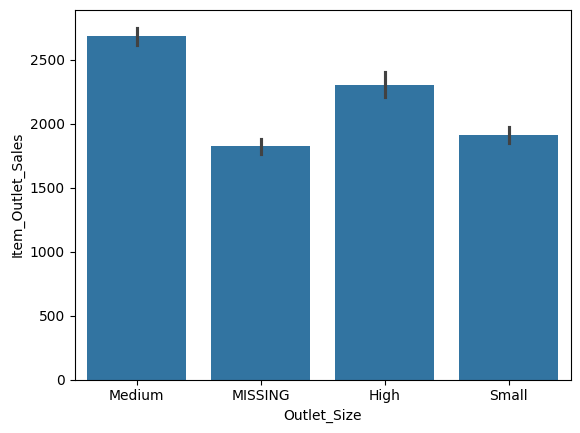

In [232]:
## Using seaborn to plot the group means
ax = sns.barplot(data=df, x='Outlet_Size', y="Item_Outlet_Sales")

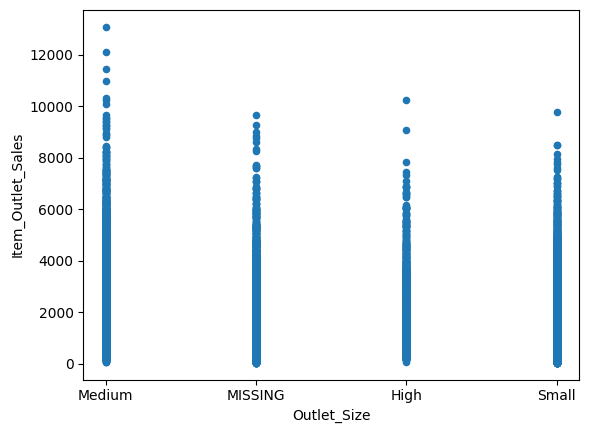

In [235]:
#Scatter plot
ax = df.plot(kind='scatter', x='Outlet_Size', y='Item_Outlet_Sales');

In [ ]:
#Based on your business understanding, would you expect this feature to be a predictor of the target?


## Yes

In [ ]:
#Does this feature appear to be a predictor of the target?

## Yes